In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')

In [ ]:
df = df[df['country'] == 'Germany']

# EDA

In [ ]:
df.shape

(2509, 12)

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
15,15643966,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0
16,15737452,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
26,15736816,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0
28,15728693,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0


Columns
1. customer_id : 계좌번호
2. credit_score : 신용점수
1. country : 거주국가
2. gender : 성별
1. age : 나이
2. tenure : 은행 이용기간
1. balance : 계좌잔고
2. products_number : 은행상품수
1. credit_card : 신용카드수
2. active_member : 활동고객여부
1. estimated_salary : 추정급여
2. churn : 이탈여부


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509 entries, 7 to 9998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       2509 non-null   int64  
 1   credit_score      2509 non-null   int64  
 2   country           2509 non-null   object 
 3   gender            2509 non-null   object 
 4   age               2509 non-null   int64  
 5   tenure            2509 non-null   int64  
 6   balance           2509 non-null   float64
 7   products_number   2509 non-null   int64  
 8   credit_card       2509 non-null   int64  
 9   active_member     2509 non-null   int64  
 10  estimated_salary  2509 non-null   float64
 11  churn             2509 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 254.8+ KB


In [ ]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

카테고리형 변수 분포 확인

<Axes: xlabel='churn', ylabel='count'>

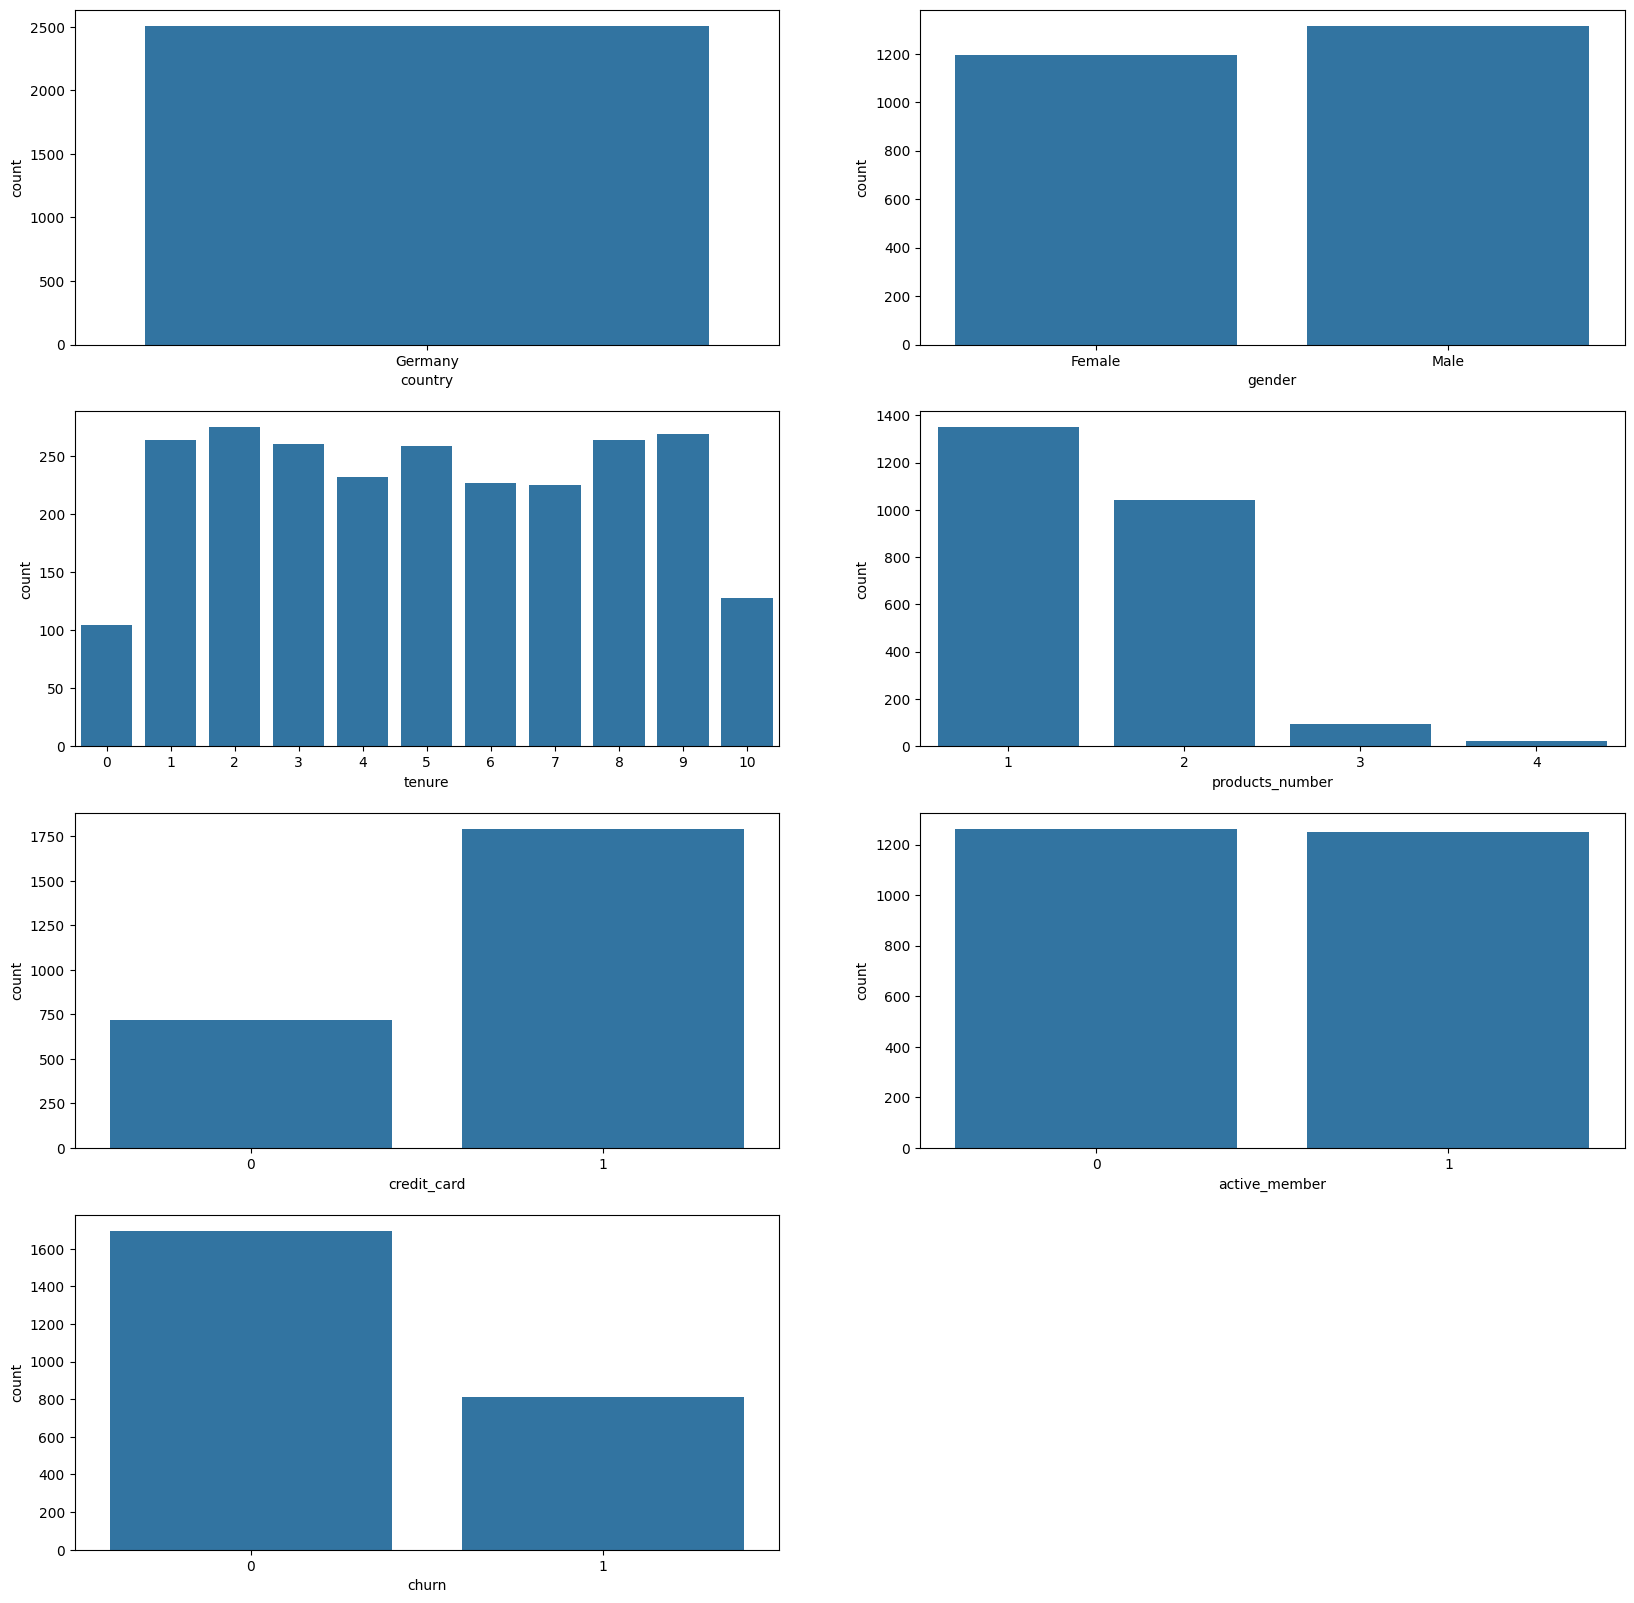

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
sns.countplot(x = 'country', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'gender', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'tenure', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'products_number', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'credit_card', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'active_member', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'churn', data = df)

수치형 변수 분포 확인

<ipython-input-12-31b6d8542ad7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['credit_score'])
<ipython-input-12-31b6d8542ad7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
<ipython-input-12-31b6d8542ad7>:10: UserWarning: 

`distplot` is a deprecated function and will be remo

<Axes: xlabel='estimated_salary', ylabel='Density'>

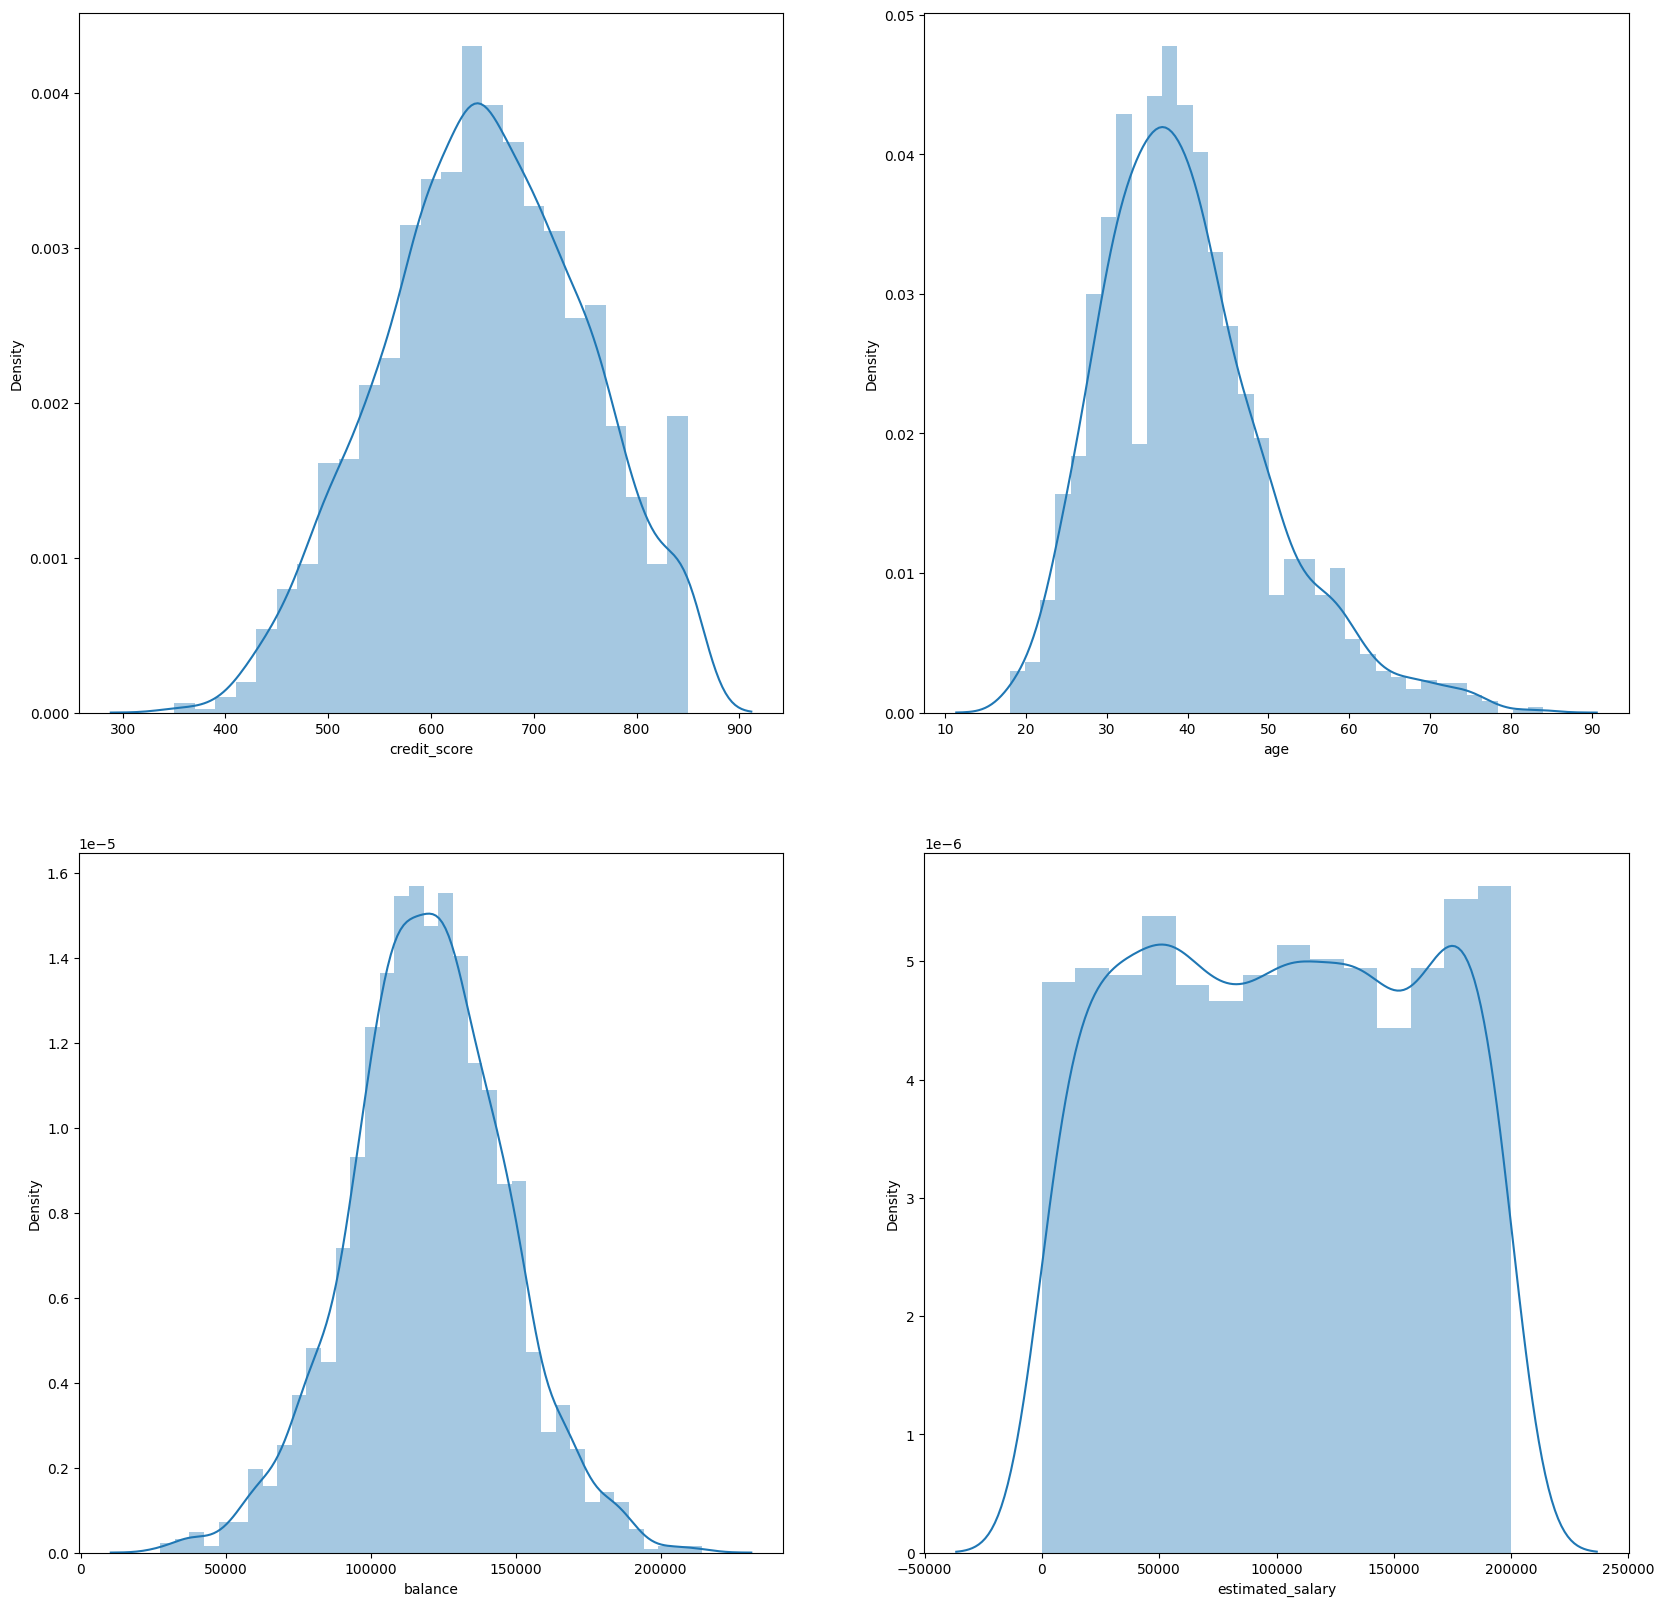

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.distplot(df['credit_score'])

plt.subplot(2,2,2)
sns.distplot(df['age'])

plt.subplot(2,2,3)
sns.distplot(df['balance'])

plt.subplot(2,2,4)
sns.distplot(df['estimated_salary'])

credit_score의 최댓값인 고객이 분포에 비해 많다.

In [ ]:
max_credit_score = df['credit_score'].max()
max_credit_score_df = df[df['credit_score'] == max_credit_score]

In [ ]:
max_credit_score_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
259,15607178,850,Germany,Male,38,3,54901.01,1,1,1,140075.55,0
792,15707473,850,Germany,Female,48,6,111962.99,1,1,0,111755.80,0
937,15662100,850,Germany,Female,44,5,128605.32,1,0,1,171096.20,0
960,15686164,850,Germany,Female,31,1,108822.40,1,1,1,132173.31,0
1018,15602010,850,Germany,Female,45,5,103909.86,1,1,0,60083.11,1


In [ ]:
max_credit_score_df['churn'].value_counts()

0    47
1    18
Name: churn, dtype: int64

독일 고객은 balance가 0인 고객이 없다.

In [ ]:
balance_zero_df = df[df['balance'] == 0]

In [ ]:
balance_zero_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


In [ ]:
balance_zero_df['churn'].value_counts()

Series([], Name: churn, dtype: int64)

In [ ]:
df['churn'].value_counts()

0    1695
1     814
Name: churn, dtype: int64

products_number가 4인 고객의 이탈율은 1이다.(전체도 마찬가지)

In [ ]:
# 제품개수가 4인 고객만 필터링
customers_with_4_products = df[df['products_number'] == 4]

# 제품개수가 4인 고객 중 이탈한 고객의 비율 계산
churn_rate_4_products = customers_with_4_products['churn'].mean()

print("제품개수가 4인 고객의 이탈율:", churn_rate_4_products)

제품개수가 4인 고객의 이탈율: 1.0


필드 간 상관관계

In [ ]:
correlation = new_df.corr()

<ipython-input-27-542b62a7273d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = new_df.corr()


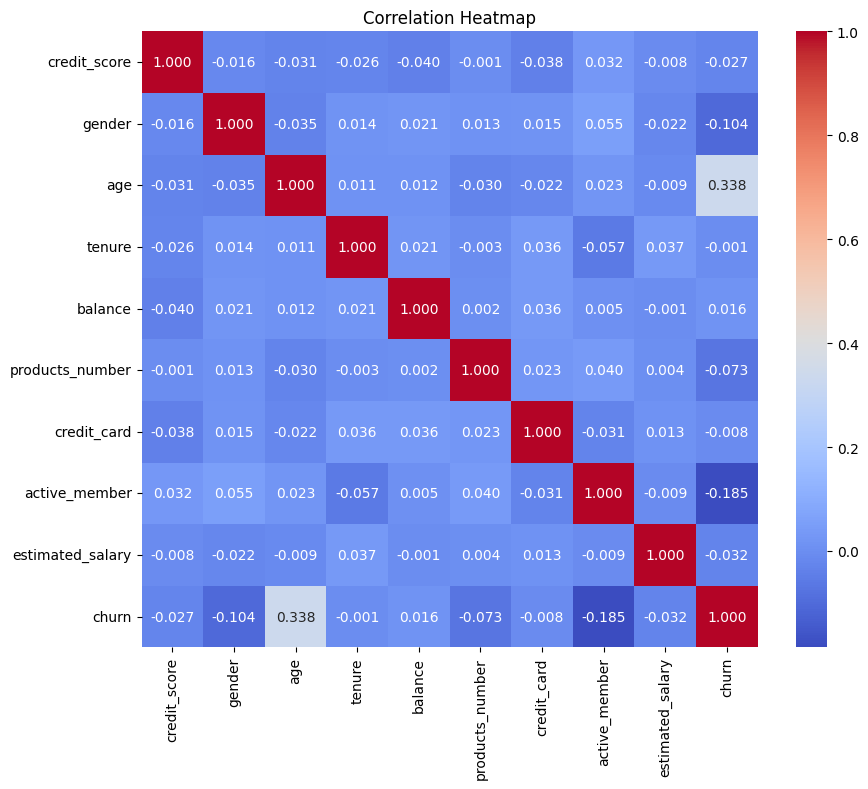

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', fmt = ".3f", square = True)
plt.title('Correlation Heatmap')
plt.show()

그나마 나이와 이탈자 간의 상관계수가 커서 이탈자와 비이탈자의 나이 분포를 확인해봤다.

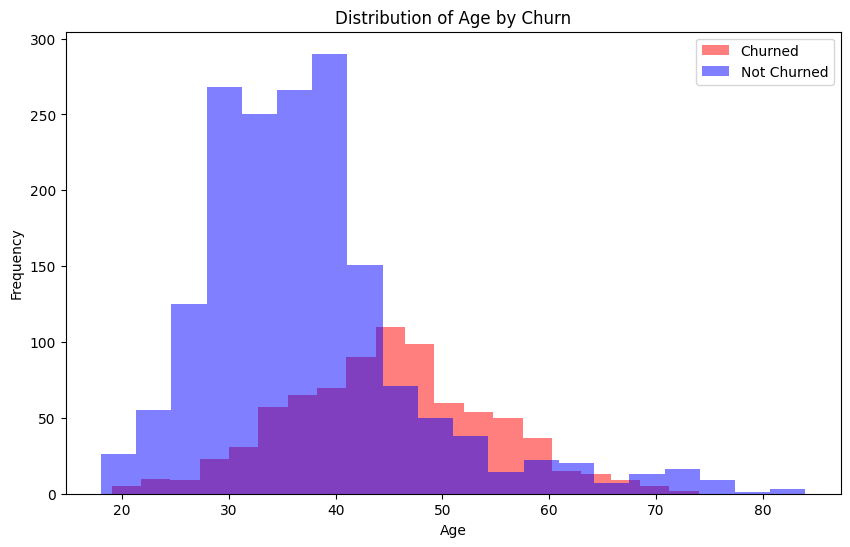

In [ ]:
age_churn_df = df[['age', 'churn']]

churned = age_churn_df[age_churn_df['churn'] == 1]['age']

not_churned = age_churn_df[age_churn_df['churn'] == 0]['age']

plt.figure(figsize=(10, 6))
plt.hist(churned, bins=20, alpha=0.5, color='red', label='Churned')
plt.hist(not_churned, bins=20, alpha=0.5, color='blue', label='Not Churned')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Churn')
plt.legend()
plt.show()

# 데이터 전처리

In [ ]:
# 새로운 데이터프레임 생성
new_df = df.drop(['customer_id','country'], axis=1)  # customer_id, country 열 삭제

# gender를 0과 1로 변환
new_df['gender'] = new_df['gender'].map({'Female': 0, 'Male': 1})

In [ ]:
# 제품개수가 4인 고객을 제외한 데이터프레임
not4_new_df = new_df[new_df['products_number'] != 4]

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509 entries, 7 to 9998
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      2509 non-null   int64  
 1   gender            2509 non-null   int64  
 2   age               2509 non-null   int64  
 3   tenure            2509 non-null   int64  
 4   balance           2509 non-null   float64
 5   products_number   2509 non-null   int64  
 6   credit_card       2509 non-null   int64  
 7   active_member     2509 non-null   int64  
 8   estimated_salary  2509 non-null   float64
 9   churn             2509 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 215.6 KB


In [ ]:
not4_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2485 entries, 15 to 9998
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      2485 non-null   int64  
 1   gender            2485 non-null   int64  
 2   age               2485 non-null   int64  
 3   tenure            2485 non-null   int64  
 4   balance           2485 non-null   float64
 5   products_number   2485 non-null   int64  
 6   credit_card       2485 non-null   int64  
 7   active_member     2485 non-null   int64  
 8   estimated_salary  2485 non-null   float64
 9   churn             2485 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 213.6 KB


# 모델 빌딩

## Logistic Regression(제품개수 4인 고객 제거 X)

### StandardScaler

훈련 세트 정확도: 0.7339312406576981
테스트 세트 정확도: 0.7211155378486056
              precision    recall  f1-score   support

           0       0.72      0.91      0.81       320
           1       0.71      0.38      0.50       182

    accuracy                           0.72       502
   macro avg       0.72      0.65      0.65       502
weighted avg       0.72      0.72      0.70       502

AUC: 0.7558035714285714


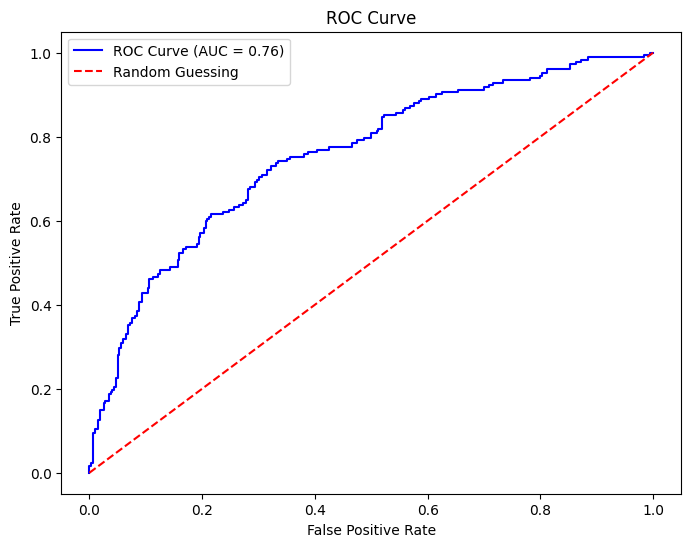

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Feature와 Target 분리
X = new_df.drop('churn', axis=1)
y = new_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 피처 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 학습
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_scaled, y_train)

# 모델 평가
train_accuracy = accuracy_score(y_train, logistic_reg.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, logistic_reg.predict(X_test_scaled))

print("훈련 세트 정확도:", train_accuracy)
print("테스트 세트 정확도:", test_accuracy)

from sklearn.metrics import classification_report

# 테스트 세트에 대한 예측 생성
y_pred = logistic_reg.predict(X_test_scaled)

# classification report 생성
report = classification_report(y_test, y_pred)

print(report)

from sklearn.metrics import roc_auc_score, roc_curve

# 예측 확률 계산
y_pred_proba = logistic_reg.predict_proba(X_test_scaled)[:, 1]

# AUC 계산
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

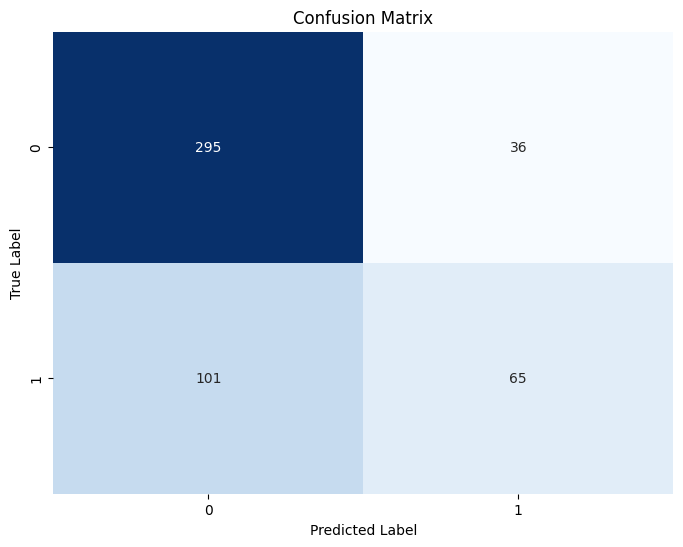

변수의 영향력:
                  Coefficient
credit_score        -0.002411
gender              -0.216996
age                  0.826307
tenure              -0.040057
balance              0.050453
products_number     -0.238352
credit_card          0.014132
active_member       -0.470605
estimated_salary    -0.059907


<ipython-input-65-8d7a5264b461>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y=coefficients.index, data=coefficients, palette='viridis')


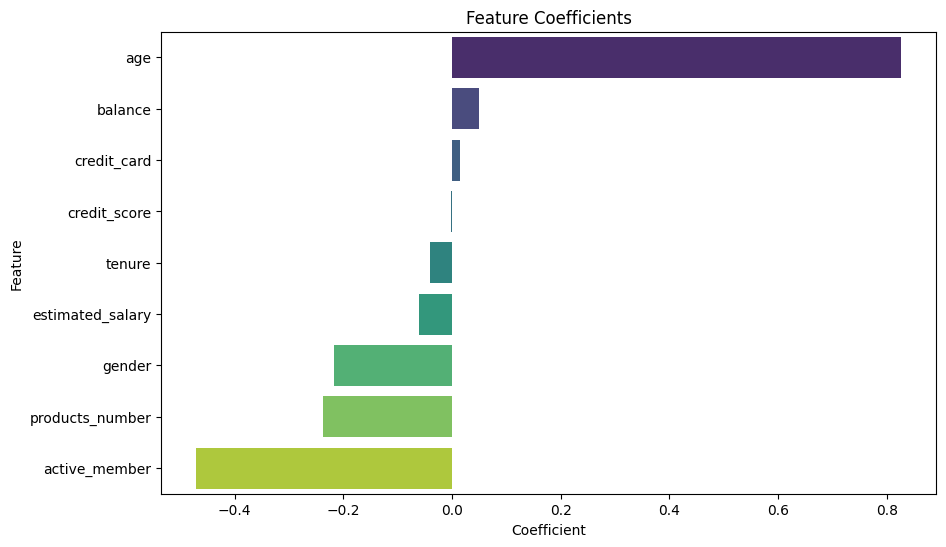

In [ ]:
# confusion matrix 계산
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 변수의 영향력 출력 (계수 확인)
coefficients = pd.DataFrame(logistic_reg.coef_.T, index=X_train.columns, columns=['Coefficient'])
print("변수의 영향력:")
print(coefficients)

# 변수의 영향력을 바 그래프로 표현
plt.figure(figsize=(10, 6))
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)  # 계수를 기준으로 내림차순 정렬
sns.barplot(x='Coefficient', y=coefficients.index, data=coefficients, palette='viridis')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()

### MinMaxScaler

훈련 세트 정확도: 0.7309417040358744
테스트 세트 정확도: 0.7171314741035857
              precision    recall  f1-score   support

           0       0.72      0.92      0.80       320
           1       0.71      0.37      0.49       182

    accuracy                           0.72       502
   macro avg       0.72      0.64      0.65       502
weighted avg       0.72      0.72      0.69       502

AUC: 0.7529189560439561


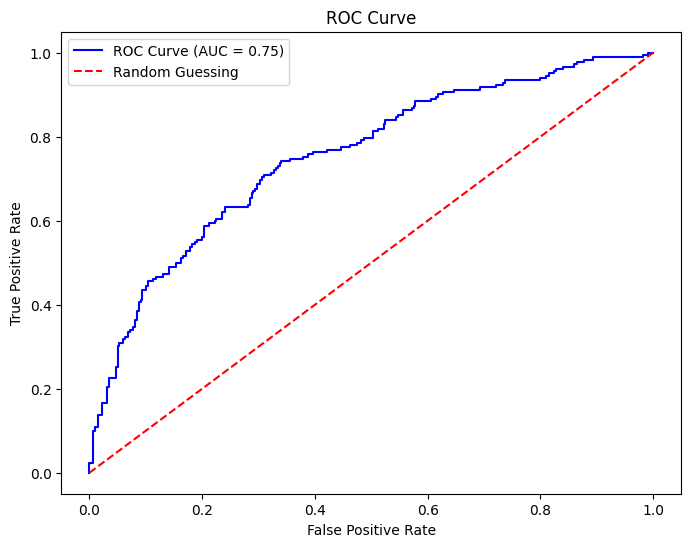

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Feature와 Target 분리
X = new_df.drop('churn', axis=1)
y = new_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 피처 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 학습
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_scaled, y_train)

# 모델 평가
train_accuracy = accuracy_score(y_train, logistic_reg.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, logistic_reg.predict(X_test_scaled))

print("훈련 세트 정확도:", train_accuracy)
print("테스트 세트 정확도:", test_accuracy)

from sklearn.metrics import classification_report

# 테스트 세트에 대한 예측 생성
y_pred = logistic_reg.predict(X_test_scaled)

# classification report 생성
report = classification_report(y_test, y_pred)

print(report)

from sklearn.metrics import roc_auc_score, roc_curve

# 예측 확률 계산
y_pred_proba = logistic_reg.predict_proba(X_test_scaled)[:, 1]

# AUC 계산
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

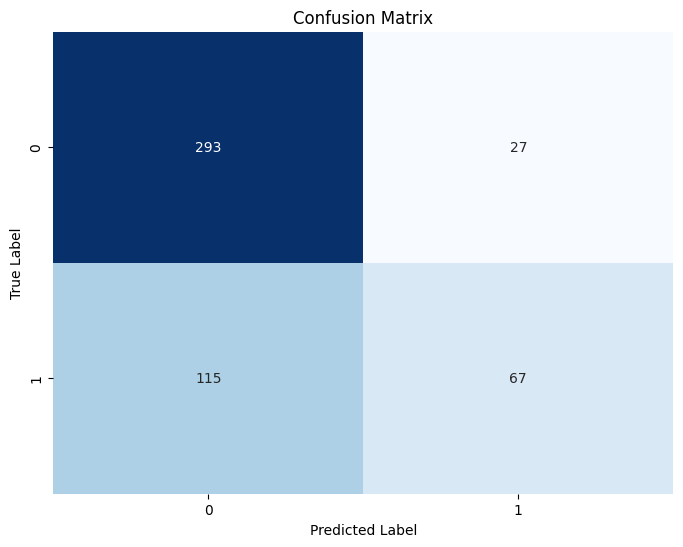

변수의 영향력:
                  Coefficient
credit_score        -0.153445
gender              -0.437598
age                  4.317341
tenure              -0.143343
balance              0.252773
products_number     -0.664172
credit_card         -0.000122
active_member       -0.932288
estimated_salary    -0.278554


<ipython-input-13-03ceb21f1841>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y=coefficients.index, data=coefficients, palette='viridis')


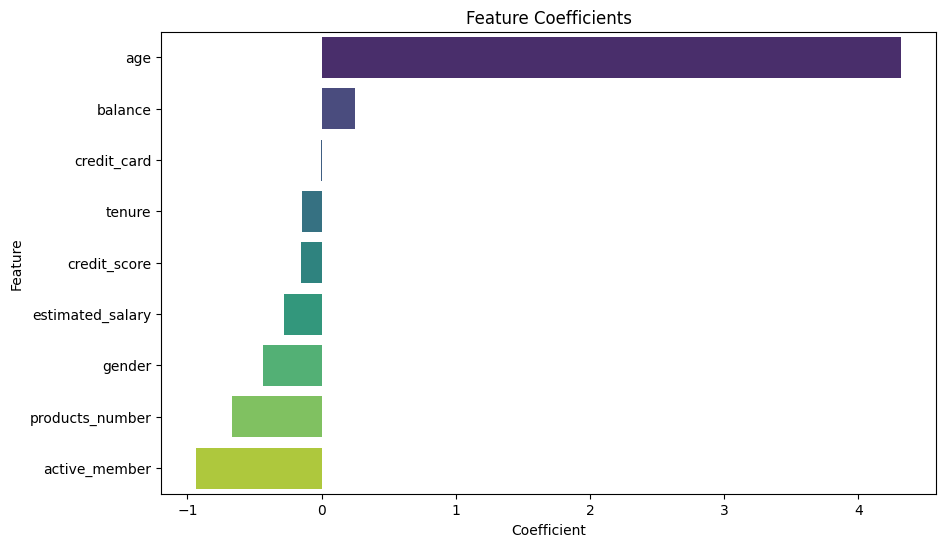

In [ ]:
# confusion matrix 계산
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 변수의 영향력 출력 (계수 확인)
coefficients = pd.DataFrame(logistic_reg.coef_.T, index=X_train.columns, columns=['Coefficient'])
print("변수의 영향력:")
print(coefficients)

# 변수의 영향력을 바 그래프로 표현
plt.figure(figsize=(10, 6))
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)  # 계수를 기준으로 내림차순 정렬
sns.barplot(x='Coefficient', y=coefficients.index, data=coefficients, palette='viridis')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()

## Logistic Regression(제품개수 4인 고객 제거 O)

### StandardScaler

훈련 세트 정확도: 0.7474849094567404
테스트 세트 정확도: 0.7243460764587525
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       331
           1       0.64      0.39      0.49       166

    accuracy                           0.72       497
   macro avg       0.69      0.64      0.65       497
weighted avg       0.71      0.72      0.70       497

AUC: 0.7456593746587559


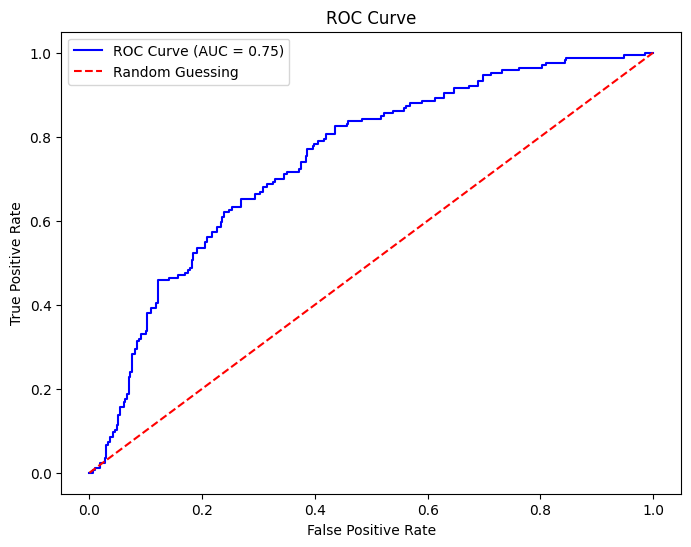

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Feature와 Target 분리
X = not4_new_df.drop('churn', axis=1)
y = not4_new_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 피처 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 학습
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_scaled, y_train)

# 모델 평가
train_accuracy = accuracy_score(y_train, logistic_reg.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, logistic_reg.predict(X_test_scaled))

print("훈련 세트 정확도:", train_accuracy)
print("테스트 세트 정확도:", test_accuracy)

from sklearn.metrics import classification_report

# 테스트 세트에 대한 예측 생성
y_pred = logistic_reg.predict(X_test_scaled)

# classification report 생성
report = classification_report(y_test, y_pred)

print(report)

from sklearn.metrics import roc_auc_score, roc_curve

# 예측 확률 계산
y_pred_proba = logistic_reg.predict_proba(X_test_scaled)[:, 1]

# AUC 계산
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

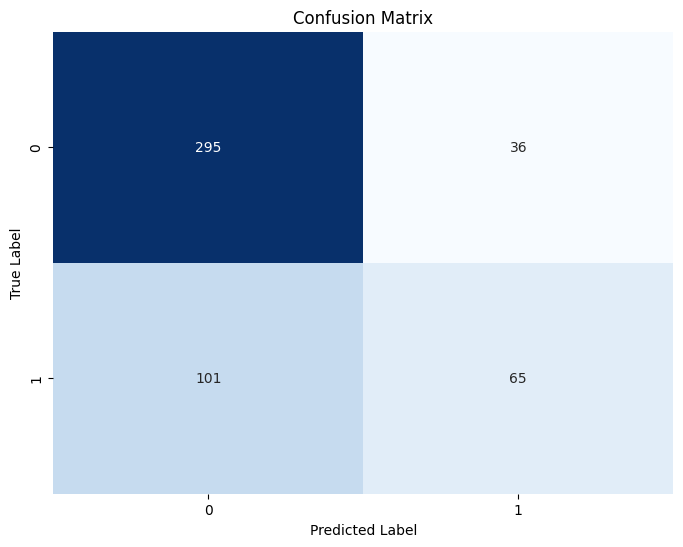

변수의 영향력:
                  Coefficient
credit_score        -0.002411
gender              -0.216996
age                  0.826307
tenure              -0.040057
balance              0.050453
products_number     -0.238352
credit_card          0.014132
active_member       -0.470605
estimated_salary    -0.059907


<ipython-input-66-8d7a5264b461>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y=coefficients.index, data=coefficients, palette='viridis')


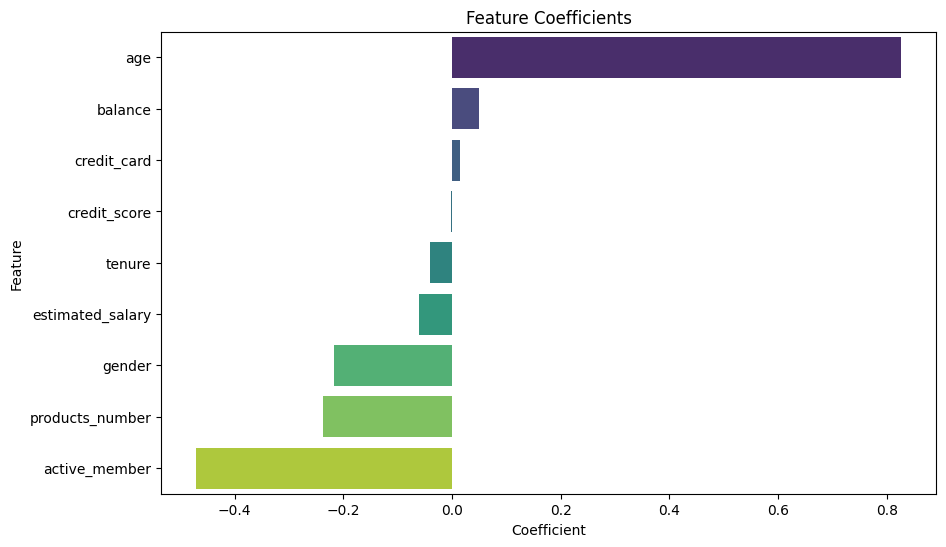

In [ ]:
# confusion matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 변수의 영향력 출력 (계수 확인)
coefficients = pd.DataFrame(logistic_reg.coef_.T, index=X_train.columns, columns=['Coefficient'])
print("변수의 영향력:")
print(coefficients)

# 변수의 영향력을 바 그래프로 표현
plt.figure(figsize=(10, 6))
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)  # 계수를 기준으로 내림차순 정렬
sns.barplot(x='Coefficient', y=coefficients.index, data=coefficients, palette='viridis')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()

### MinMaxScaler

훈련 세트 정확도: 0.7449698189134809
테스트 세트 정확도: 0.7203219315895373
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       331
           1       0.65      0.36      0.46       166

    accuracy                           0.72       497
   macro avg       0.69      0.63      0.64       497
weighted avg       0.71      0.72      0.69       497

AUC: 0.7446947912495905


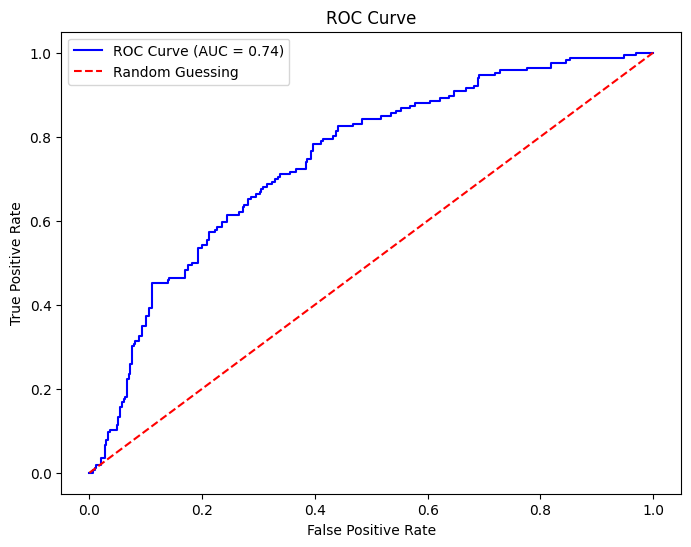

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Feature와 Target 분리
X = not4_new_df.drop('churn', axis=1)
y = not4_new_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 피처 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 학습
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_scaled, y_train)

# 모델 평가
train_accuracy = accuracy_score(y_train, logistic_reg.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, logistic_reg.predict(X_test_scaled))

print("훈련 세트 정확도:", train_accuracy)
print("테스트 세트 정확도:", test_accuracy)

from sklearn.metrics import classification_report

# 테스트 세트에 대한 예측 생성
y_pred = logistic_reg.predict(X_test_scaled)

# classification report 생성
report = classification_report(y_test, y_pred)

print(report)

from sklearn.metrics import roc_auc_score, roc_curve

# 예측 확률 계산
y_pred_proba = logistic_reg.predict_proba(X_test_scaled)[:, 1]

# AUC 계산
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

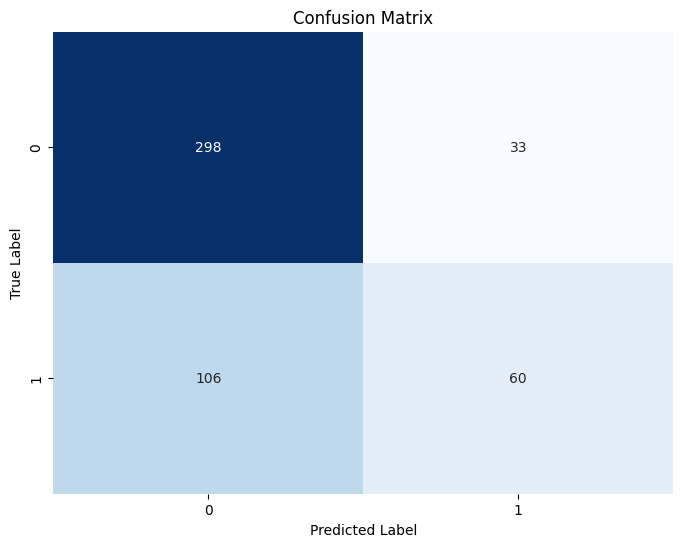

변수의 영향력:
                  Coefficient
credit_score        -0.022782
gender              -0.430737
age                  4.596434
tenure              -0.123058
balance              0.306428
products_number     -0.808673
credit_card          0.027700
active_member       -0.906944
estimated_salary    -0.195480


<ipython-input-15-8d7a5264b461>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y=coefficients.index, data=coefficients, palette='viridis')


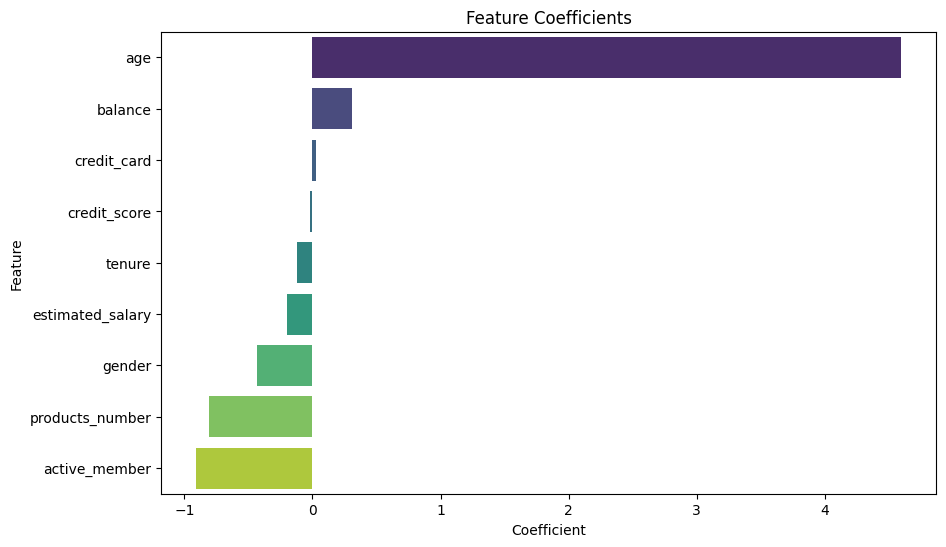

In [ ]:
# confusion matrix 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 변수의 영향력 출력 (계수 확인)
coefficients = pd.DataFrame(logistic_reg.coef_.T, index=X_train.columns, columns=['Coefficient'])
print("변수의 영향력:")
print(coefficients)

# 변수의 영향력을 바 그래프로 표현
plt.figure(figsize=(10, 6))
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)  # 계수를 기준으로 내림차순 정렬
sns.barplot(x='Coefficient', y=coefficients.index, data=coefficients, palette='viridis')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()

## Decision Trees(제품개수 4인 고객 제거 X)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 데이터를 피처와 타겟 변수로 분리
X = new_df.drop('churn', axis=1)
y = new_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델 생성
model = DecisionTreeClassifier(criterion='entropy',
                            max_depth=5,
                            min_samples_split=5)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# classification report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


정확도: 0.8147410358565738
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       320
           1       0.80      0.65      0.72       182

    accuracy                           0.81       502
   macro avg       0.81      0.78      0.79       502
weighted avg       0.81      0.81      0.81       502

Confusion Matrix:
[[291  29]
 [ 64 118]]


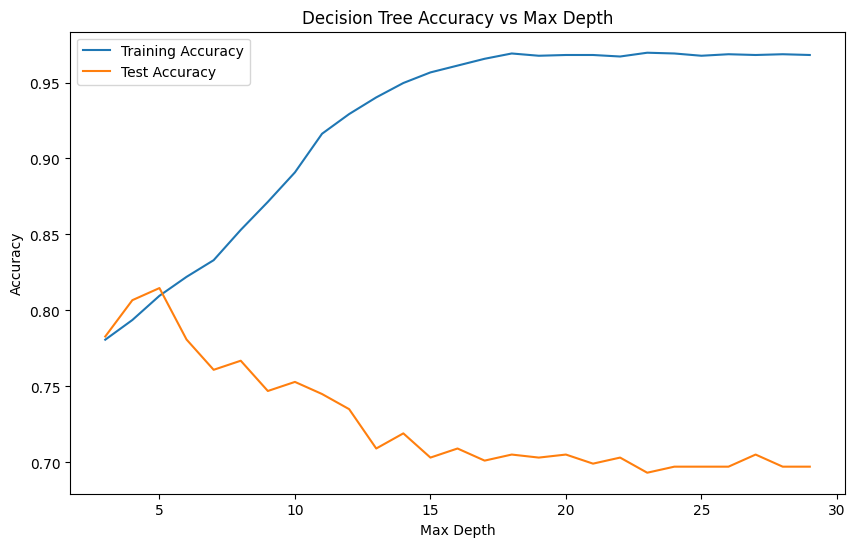

In [ ]:
# max depth에 따른 학습 결과 경향성 파악
max_depths = range(3, 30)

train_accuracies = []
test_accuracies = []

for depth in max_depths:
    model = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=depth,
                                   min_samples_split=5)
    model.fit(X_train, y_train)

    # 학습 데이터에 대한 정확도
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # 평가 데이터에 대한 정확도
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()
plt.show()

In [ ]:
# 최대 정확도를 달성하는 max_depth를 찾고 해당 depth로 최적 모델 학습
max_acc = max(test_accuracies)
best_depth = max_depths[test_accuracies.index(max_acc)]
print('최대 정확도의 depth :', best_depth)

dt = DecisionTreeClassifier(criterion='entropy',
                            max_depth=best_depth,
                            min_samples_split=5)

최대 정확도의 depth : 5


## Decision Trees(제품개수 4인 고객 제거 O)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 데이터를 피처와 타겟 변수로 분리
X = not4_new_df.drop('churn', axis=1)
y = not4_new_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델 생성
model = DecisionTreeClassifier(criterion='entropy',
                            max_depth=5,
                            min_samples_split=5)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# classification report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

정확도: 0.778672032193159
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       331
           1       0.76      0.49      0.60       166

    accuracy                           0.78       497
   macro avg       0.77      0.71      0.72       497
weighted avg       0.78      0.78      0.76       497

Confusion Matrix:
[[306  25]
 [ 85  81]]


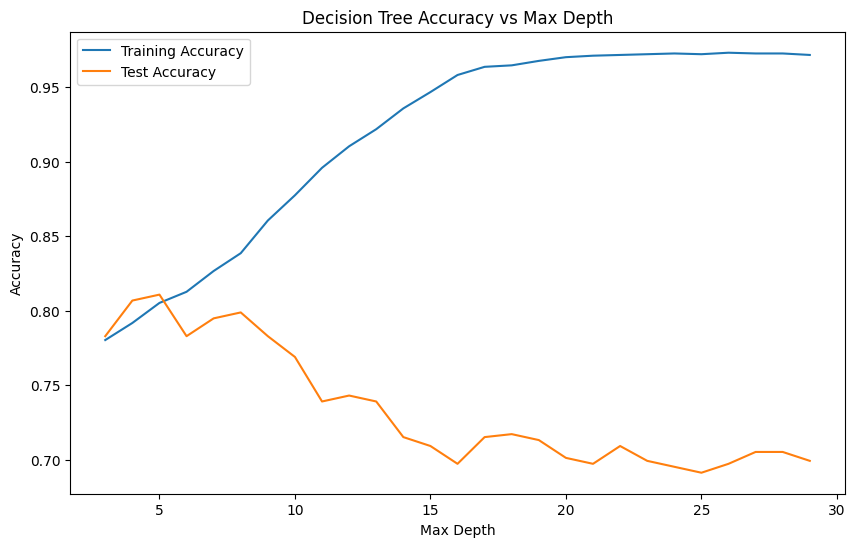

In [ ]:
# max depth에 따른 학습 결과 경향성 파악
max_depths = range(3, 30)

train_accuracies = []
test_accuracies = []

for depth in max_depths:
    model = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=depth,
                                   min_samples_split=5)
    model.fit(X_train, y_train)

    # 학습 데이터에 대한 정확도
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # 평가 데이터에 대한 정확도
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()
plt.show()

In [ ]:
# 최대 정확도를 달성하는 max_depth를 찾고 해당 depth로 최적 모델 학습
max_acc = max(test_accuracies)
best_depth = max_depths[test_accuracies.index(max_acc)]
print('최대 정확도의 depth :', best_depth)

dt = DecisionTreeClassifier(criterion='entropy',
                            max_depth=best_depth,
                            min_samples_split=5)

최대 정확도의 depth : 5


## Random Forest(제품개수 4인 고객 제거 X)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 데이터를 피처와 타겟 변수로 분리
X =  new_df.drop('churn', axis=1)
y =  new_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성
model = RandomForestClassifier(n_estimators = 200, criterion='entropy',
                                   max_depth=27,
                                   min_samples_split=5)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# classification report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


정확도: 0.8306772908366534
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       320
           1       0.83      0.66      0.74       182

    accuracy                           0.83       502
   macro avg       0.83      0.79      0.81       502
weighted avg       0.83      0.83      0.83       502

Confusion Matrix:
[[296  24]
 [ 61 121]]


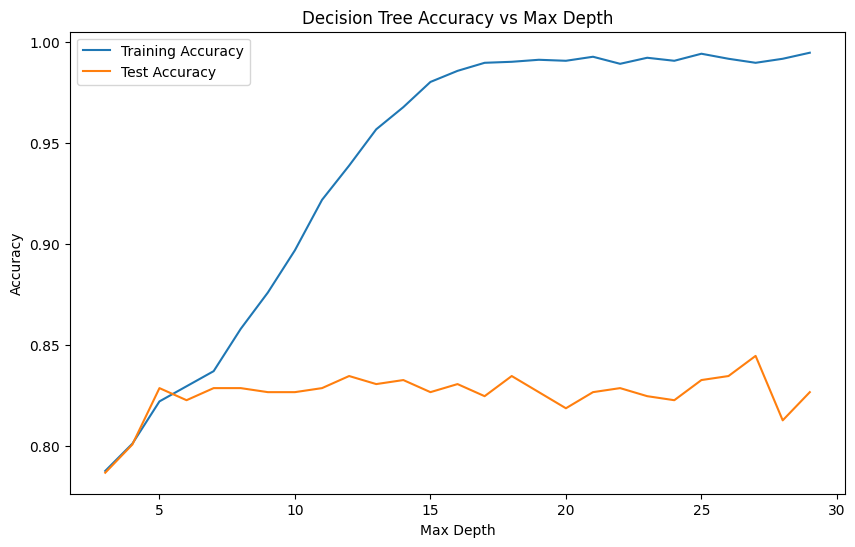

In [ ]:
# max depth에 따른 학습 결과 경향성 파악
max_depths = range(3, 30)

train_accuracies = []
test_accuracies = []

for depth in max_depths:
    model = RandomForestClassifier(n_estimators = 200, criterion='entropy',
                                   max_depth=depth,
                                   min_samples_split=5)
    model.fit(X_train, y_train)

    # 학습 데이터에 대한 정확도
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # 평가 데이터에 대한 정확도
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()
plt.show()

In [ ]:
# 최대 정확도를 달성하는 max_depth를 찾고 해당 depth로 최적 모델 학습
max_acc = max(test_accuracies)
best_depth = max_depths[test_accuracies.index(max_acc)]
print('최대 정확도의 depth :', best_depth)

dt = RandomForestClassifier(n_estimators = 200, criterion='entropy',
                                   max_depth=depth,
                                   min_samples_split=5)

최대 정확도의 depth : 27


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 랜덤 포레스트 모델 생성
model = RandomForestClassifier()

# 모델 학습
model.fit(X_train, y_train)

# 피처의 중요도 출력
feature_importances = model.feature_importances_
print("피처의 중요도:", feature_importances)

# 중요도를 데이터프레임으로 변환하여 피처 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
print(feature_importance_df)


피처의 중요도: [0.1373859  0.02167504 0.25184386 0.08369906 0.17123187 0.1371907
 0.0195123  0.03801483 0.13944643]
            Feature  Importance
0      credit_score    0.137386
1            gender    0.021675
2               age    0.251844
3            tenure    0.083699
4           balance    0.171232
5   products_number    0.137191
6       credit_card    0.019512
7     active_member    0.038015
8  estimated_salary    0.139446


## Random Forest(제품개수 4인 고객 제거 O)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 데이터를 피처와 타겟 변수로 분리
X =  not4_new_df.drop('churn', axis=1)
y =  not4_new_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성
model = RandomForestClassifier(n_estimators = 200, criterion='entropy',
                                   max_depth=10,
                                   min_samples_split=5)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# classification report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

정확도: 0.8008048289738431
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       331
           1       0.81      0.53      0.64       166

    accuracy                           0.80       497
   macro avg       0.80      0.73      0.75       497
weighted avg       0.80      0.80      0.79       497

Confusion Matrix:
[[310  21]
 [ 78  88]]


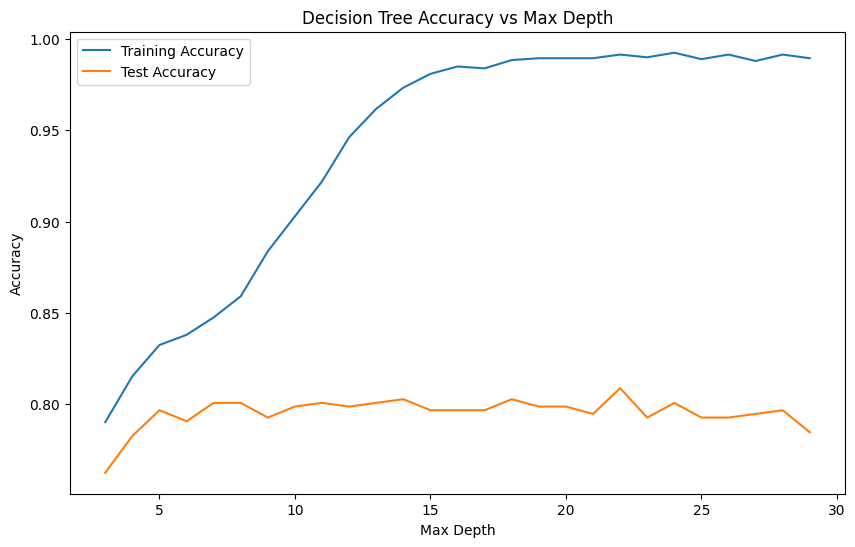

In [ ]:
# max depth에 따른 학습 결과 경향성 파악
max_depths = range(3, 30)

train_accuracies = []
test_accuracies = []

for depth in max_depths:
    model = RandomForestClassifier(n_estimators = 200, criterion='entropy',
                                   max_depth=depth,
                                   min_samples_split=5)
    model.fit(X_train, y_train)

    # 학습 데이터에 대한 정확도
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # 평가 데이터에 대한 정확도
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()
plt.show()

In [ ]:
# 최대 정확도를 달성하는 max_depth를 찾고 해당 depth로 최적 모델 학습
max_acc = max(test_accuracies)
best_depth = max_depths[test_accuracies.index(max_acc)]
print('최대 정확도의 depth :', best_depth)

dt = DecisionTreeClassifier(criterion='entropy',
                            max_depth=best_depth,
                            min_samples_split=5)

최대 정확도의 depth : 22


## SVM(제품개수 4인 고객 제거 X)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 데이터를 피처와 타겟 변수로 분리
X = new_df.drop('churn', axis=1)
y = new_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM 모델 생성
model = SVC(kernel='linear', random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# classification report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


정확도: 0.6633466135458167
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.93      0.78       320
           1       0.62      0.19      0.29       182

    accuracy                           0.66       502
   macro avg       0.64      0.56      0.53       502
weighted avg       0.65      0.66      0.60       502

Confusion Matrix:
[[299  21]
 [148  34]]


## SVM(제품개수 4인 고객 제거 O)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 데이터를 피처와 타겟 변수로 분리
X = not4_new_df.drop('churn', axis=1)
y = not4_new_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM 모델 생성
model = SVC(kernel='linear', random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# classification report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


정확도: 0.6740442655935613
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       331
           1       0.53      0.19      0.28       166

    accuracy                           0.67       497
   macro avg       0.61      0.55      0.54       497
weighted avg       0.64      0.67      0.62       497

Confusion Matrix:
[[303  28]
 [134  32]]


## KNN(제품개수 4인 고객 제거 X)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 데이터를 피처와 타겟 변수로 분리
X = new_df.drop('churn', axis=1)
y = new_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 모델 생성
model = KNeighborsClassifier(n_neighbors=5)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# classification report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

정확도: 0.6115537848605578
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       320
           1       0.44      0.27      0.33       182

    accuracy                           0.61       502
   macro avg       0.55      0.54      0.53       502
weighted avg       0.58      0.61      0.58       502

Confusion Matrix:
[[258  62]
 [133  49]]


## KNN(제품개수 4인 고객 제거 O)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 데이터를 피처와 타겟 변수로 분리
X = not4_new_df.drop('churn', axis=1)
y = not4_new_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 모델 생성
model = KNeighborsClassifier(n_neighbors=5)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# classification report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


정확도: 0.6056338028169014
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.79      0.73       331
           1       0.36      0.23      0.28       166

    accuracy                           0.61       497
   macro avg       0.52      0.51      0.51       497
weighted avg       0.57      0.61      0.58       497

Confusion Matrix:
[[262  69]
 [127  39]]


## Naive Bayes(제품개수 4인 고객 제거 X)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 데이터를 피처와 타겟 변수로 분리
X = new_df.drop('churn', axis=1)
y = new_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes 모델 생성
model = GaussianNB()

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# classification report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


정확도: 0.7290836653386454
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.82       320
           1       0.77      0.36      0.49       182

    accuracy                           0.73       502
   macro avg       0.74      0.65      0.65       502
weighted avg       0.74      0.73      0.70       502

Confusion Matrix:
[[300  20]
 [116  66]]


## Naive Bayes(제품개수 4인 고객 제거 O)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 데이터를 피처와 타겟 변수로 분리
X = not4_new_df.drop('churn', axis=1)
y = not4_new_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes 모델 생성
model = GaussianNB()

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# classification report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

정확도: 0.7082494969818913
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       331
           1       0.62      0.32      0.42       166

    accuracy                           0.71       497
   macro avg       0.67      0.61      0.61       497
weighted avg       0.69      0.71      0.68       497

Confusion Matrix:
[[299  32]
 [113  53]]


## Gradient Boosting(제품개수 4인 고객 제거 X)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터를 피처와 타겟 변수로 분리
X = new_df.drop('churn', axis=1)
y = new_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting 모델 생성
model = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.1,
                                   max_depth=3,
                                   min_samples_split=5)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# classification report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


정확도: 0.8326693227091634
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87       320
           1       0.82      0.69      0.75       182

    accuracy                           0.83       502
   macro avg       0.83      0.80      0.81       502
weighted avg       0.83      0.83      0.83       502

Confusion Matrix:
[[293  27]
 [ 57 125]]


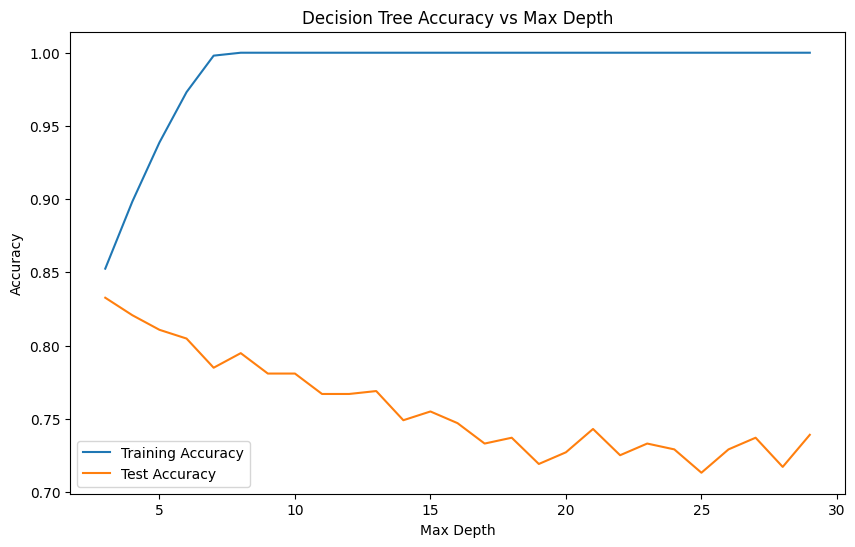

In [ ]:
# max depth에 따른 학습 결과 경향성 파악
max_depths = range(3, 30)

train_accuracies = []
test_accuracies = []

for depth in max_depths:
    model = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.1,
                                   max_depth=depth,
                                   min_samples_split=5)
    model.fit(X_train, y_train)

    # 학습 데이터에 대한 정확도
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # 평가 데이터에 대한 정확도
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()
plt.show()

In [ ]:
# 최대 정확도를 달성하는 max_depth를 찾고 해당 depth로 최적 모델 학습
max_acc = max(test_accuracies)
best_depth = max_depths[test_accuracies.index(max_acc)]
print('최대 정확도의 depth :', best_depth)

dt = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.01,
                                   max_depth=depth,
                                min_samples_split=5)

최대 정확도의 depth : 3


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# 그래디언트 부스팅 모델 생성
model = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.01,
                                   max_depth=depth,
                                min_samples_split=5)

# 모델 학습
model.fit(X_train, y_train)

# 피처의 중요도 출력
feature_importances = model.feature_importances_
print("피처의 중요도:", feature_importances)

# 중요도를 데이터프레임으로 변환하여 피처 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
print(feature_importance_df)


피처의 중요도: [0.12203328 0.0145972  0.24389832 0.06793537 0.18824223 0.14172278
 0.01922894 0.04966004 0.15268185]
            Feature  Importance
0      credit_score    0.122033
1            gender    0.014597
2               age    0.243898
3            tenure    0.067935
4           balance    0.188242
5   products_number    0.141723
6       credit_card    0.019229
7     active_member    0.049660
8  estimated_salary    0.152682


## Gradient Boosting(제품개수 4인 고객 제거 O)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터를 피처와 타겟 변수로 분리
X = not4_new_df.drop('churn', axis=1)
y = not4_new_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting 모델 생성
model = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.1,
                                   max_depth=3,
                                   min_samples_split=5)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# classification report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

정확도: 0.8108651911468813
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       331
           1       0.77      0.61      0.68       166

    accuracy                           0.81       497
   macro avg       0.80      0.76      0.77       497
weighted avg       0.81      0.81      0.80       497

Confusion Matrix:
[[301  30]
 [ 64 102]]


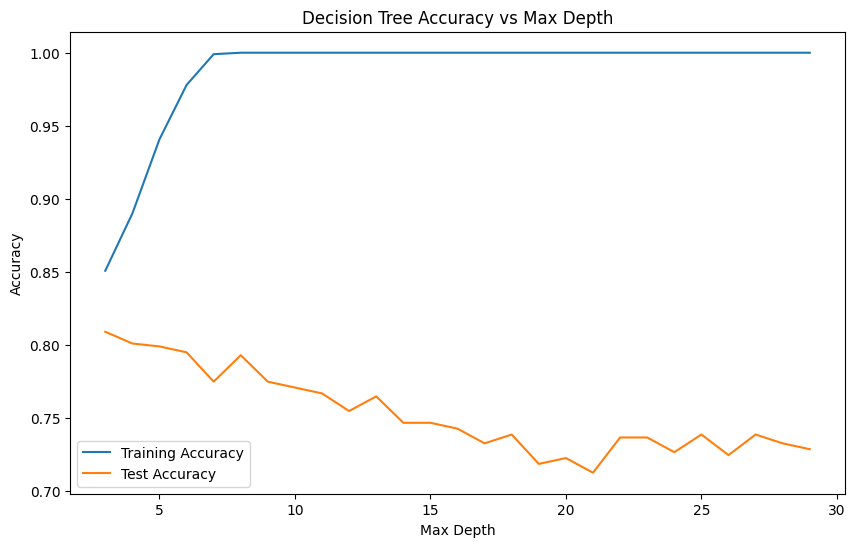

In [ ]:
# max depth에 따른 학습 결과 경향성 파악
max_depths = range(3, 30)

train_accuracies = []
test_accuracies = []

for depth in max_depths:
    model = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.1,
                                   max_depth=depth,
                                   min_samples_split=5)
    model.fit(X_train, y_train)

    # 학습 데이터에 대한 정확도
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # 평가 데이터에 대한 정확도
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()
plt.show()

In [ ]:
# 최대 정확도를 달성하는 max_depth를 찾고 해당 depth로 최적 모델 학습
max_acc = max(test_accuracies)
best_depth = max_depths[test_accuracies.index(max_acc)]
print('최대 정확도의 depth :', best_depth)

dt = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.1,
                                   max_depth=depth,
                                   min_samples_split=5)

최대 정확도의 depth : 3


# Gradient Boosting(제품개수 4인 고객 제거 X)에서 feature 조작

## gender와 credit_card 열을 제거

In [ ]:
# gender와 credit_card 열을 제거한 데이터프레임 생성
test1_df= new_df.drop(['gender', 'credit_card'], axis=1)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터를 피처와 타겟 변수로 분리
X = test1_df.drop('churn', axis=1)
y = test1_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting 모델 생성
model = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.1,
                                   max_depth=3,
                                   min_samples_split=5)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# classification report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

정확도: 0.8366533864541833
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       320
           1       0.83      0.69      0.75       182

    accuracy                           0.84       502
   macro avg       0.83      0.81      0.82       502
weighted avg       0.84      0.84      0.83       502

Confusion Matrix:
[[294  26]
 [ 56 126]]


In [ ]:
# 최대 정확도를 달성하는 max_depth를 찾고 해당 depth로 최적 모델 학습
max_acc = max(test_accuracies)
best_depth = max_depths[test_accuracies.index(max_acc)]
print('최대 정확도의 depth :', best_depth)

dt = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.01,
                                   max_depth=depth,
                                min_samples_split=5)

최대 정확도의 depth : 3


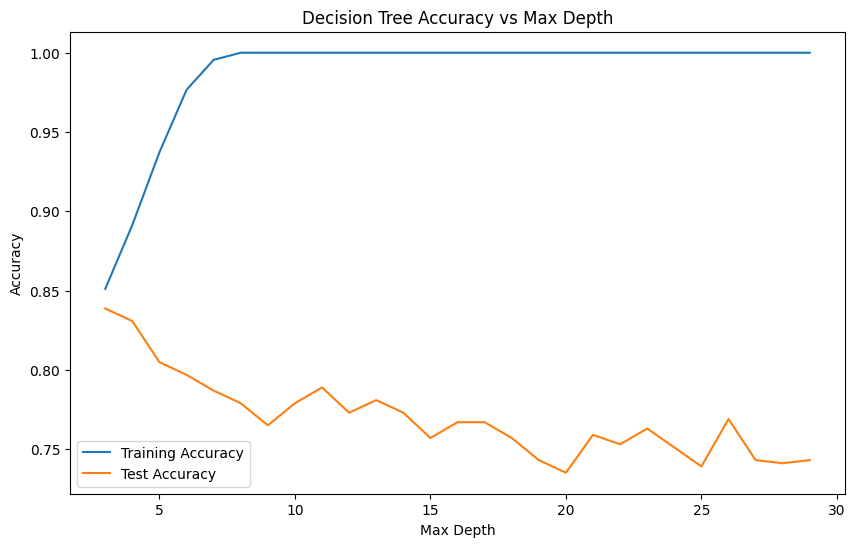

In [ ]:
# max depth에 따른 학습 결과 경향성 파악
max_depths = range(3, 30)

train_accuracies = []
test_accuracies = []

for depth in max_depths:
    model = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.1,
                                   max_depth=depth,
                                   min_samples_split=5)
    model.fit(X_train, y_train)

    # 학습 데이터에 대한 정확도
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # 평가 데이터에 대한 정확도
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# 그래디언트 부스팅 모델 생성
model = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.01,
                                   max_depth=depth,
                                min_samples_split=5)

# 모델 학습
model.fit(X_train, y_train)

# 피처의 중요도 출력
feature_importances = model.feature_importances_
print("피처의 중요도:", feature_importances)

# 중요도를 데이터프레임으로 변환하여 피처 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
print(feature_importance_df)

피처의 중요도: [0.13418592 0.24342654 0.07230824 0.20001505 0.14282347 0.05100903
 0.15623176]
            Feature  Importance
0      credit_score    0.134186
1               age    0.243427
2            tenure    0.072308
3           balance    0.200015
4   products_number    0.142823
5     active_member    0.051009
6  estimated_salary    0.156232


## gender, credit_card, tenure, active_member 열을 제거

In [ ]:
# gender, credit_card, tenure, active_member 열을 제거한 데이터프레임 생성
test2_df= new_df.drop(['gender', 'credit_card', 'tenure','active_member'], axis=1)

In [ ]:
# 데이터를 피처와 타겟 변수로 분리
X = test2_df.drop('churn', axis=1)
y = test2_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting 모델 생성
model = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.1,
                                   max_depth=3,
                                   min_samples_split=5)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# classification report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

정확도: 0.8067729083665338
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       320
           1       0.79      0.64      0.71       182

    accuracy                           0.81       502
   macro avg       0.80      0.77      0.78       502
weighted avg       0.81      0.81      0.80       502

Confusion Matrix:
[[289  31]
 [ 66 116]]


In [ ]:
# 그래디언트 부스팅 모델 생성
model = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.01,
                                   max_depth=depth,
                                min_samples_split=5)

# 모델 학습
model.fit(X_train, y_train)

# 피처의 중요도 출력
feature_importances = model.feature_importances_
print("피처의 중요도:", feature_importances)

# 중요도를 데이터프레임으로 변환하여 피처 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
print(feature_importance_df)

피처의 중요도: [0.16682126 0.2557793  0.22642443 0.15544948 0.19552553]
            Feature  Importance
0      credit_score    0.166821
1               age    0.255779
2           balance    0.226424
3   products_number    0.155449
4  estimated_salary    0.195526


## gender, credit_card, active_member 열을 제거

In [ ]:
# gender, credit_card,active_member 열을 제거한 데이터프레임 생성
test3_df= new_df.drop(['gender', 'credit_card','active_member'], axis=1)

In [ ]:
# 데이터를 피처와 타겟 변수로 분리
X = test3_df.drop('churn', axis=1)
y = test3_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting 모델 생성
model = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.1,
                                   max_depth=3,
                                   min_samples_split=5)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# classification report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

정확도: 0.8067729083665338
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       320
           1       0.78      0.65      0.71       182

    accuracy                           0.81       502
   macro avg       0.80      0.77      0.78       502
weighted avg       0.80      0.81      0.80       502

Confusion Matrix:
[[287  33]
 [ 64 118]]


In [ ]:
# 그래디언트 부스팅 모델 생성
model = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.01,
                                   max_depth=depth,
                                min_samples_split=5)

# 모델 학습
model.fit(X_train, y_train)

# 피처의 중요도 출력
feature_importances = model.feature_importances_
print("피처의 중요도:", feature_importances)

# 중요도를 데이터프레임으로 변환하여 피처 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
print(feature_importance_df)

피처의 중요도: [0.14813769 0.24718423 0.07374606 0.20704352 0.15532298 0.16856553]
            Feature  Importance
0      credit_score    0.148138
1               age    0.247184
2            tenure    0.073746
3           balance    0.207044
4   products_number    0.155323
5  estimated_salary    0.168566


## gender열을 제거

In [ ]:
# gender열을 제거한 데이터프레임 생성
test4_df= new_df.drop(['gender'], axis=1)

# 데이터를 피처와 타겟 변수로 분리
X = test4_df.drop('churn', axis=1)
y = test4_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting 모델 생성
model = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.1,
                                   max_depth=3,
                                   min_samples_split=5)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# classification report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

정확도: 0.8227091633466136
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       320
           1       0.81      0.66      0.73       182

    accuracy                           0.82       502
   macro avg       0.82      0.79      0.80       502
weighted avg       0.82      0.82      0.82       502

Confusion Matrix:
[[292  28]
 [ 61 121]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# 그래디언트 부스팅 모델 생성
model = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.01,
                                   max_depth=depth,
                                min_samples_split=5)

# 모델 학습
model.fit(X_train, y_train)

# 피처의 중요도 출력
feature_importances = model.feature_importances_
print("피처의 중요도:", feature_importances)

# 중요도를 데이터프레임으로 변환하여 피처 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
print(feature_importance_df)

피처의 중요도: [0.12418756 0.24691428 0.06574219 0.20121072 0.14229538 0.02029412
 0.04840252 0.15095322]
            Feature  Importance
0      credit_score    0.124188
1               age    0.246914
2            tenure    0.065742
3           balance    0.201211
4   products_number    0.142295
5       credit_card    0.020294
6     active_member    0.048403
7  estimated_salary    0.150953


## credit_card열을 제거

In [ ]:
# credit_card열을 제거한 데이터프레임 생성
test5_df= new_df.drop(['credit_card'], axis=1)

# 데이터를 피처와 타겟 변수로 분리
X = test5_df.drop('churn', axis=1)
y = test5_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting 모델 생성
model = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.1,
                                   max_depth=3,
                                   min_samples_split=5)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# classification report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

정확도: 0.8227091633466136
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       320
           1       0.81      0.66      0.73       182

    accuracy                           0.82       502
   macro avg       0.82      0.79      0.80       502
weighted avg       0.82      0.82      0.82       502

Confusion Matrix:
[[292  28]
 [ 61 121]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# 그래디언트 부스팅 모델 생성
model = GradientBoostingClassifier(n_estimators = 100,learning_rate=0.01,
                                   max_depth=depth,
                                min_samples_split=5)

# 모델 학습
model.fit(X_train, y_train)

# 피처의 중요도 출력
feature_importances = model.feature_importances_
print("피처의 중요도:", feature_importances)

# 중요도를 데이터프레임으로 변환하여 피처 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
print(feature_importance_df)

피처의 중요도: [0.13257369 0.01559461 0.23937378 0.07106682 0.19158974 0.14253288
 0.05007697 0.1571915 ]
            Feature  Importance
0      credit_score    0.132574
1            gender    0.015595
2               age    0.239374
3            tenure    0.071067
4           balance    0.191590
5   products_number    0.142533
6     active_member    0.050077
7  estimated_salary    0.157192


## RandomForest feature 조작

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 데이터를 피처와 타겟 변수로 분리
X =  test1_df.drop('churn', axis=1)
y =  test1_df['churn']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성
model = RandomForestClassifier(n_estimators = 100, criterion='entropy',
                                   max_depth=10,
                                   min_samples_split=5)

# 모델 학습
model.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# classification report 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

정확도: 0.8386454183266933
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       320
           1       0.86      0.66      0.75       182

    accuracy                           0.84       502
   macro avg       0.85      0.80      0.81       502
weighted avg       0.84      0.84      0.83       502

Confusion Matrix:
[[301  19]
 [ 62 120]]
